## Recognize Handwritten digits 

<img src="figure2.png" width="400" height="200">

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# Import required libraries
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

# FC@512+relu -> FC@512+relu -> FC@nb_classes+softmax

In [11]:
# Build a sequential model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001),metrics=['accuracy'])

In [12]:
# Download the data
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
# Reshape data to be in vectorial form (original data are images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
# Split Training and Validation Data
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [16]:
X_train[0].shape

(784,)

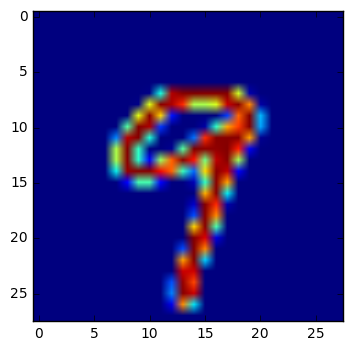

In [17]:
plt.imshow(X_train[0].reshape(28, 28))

In [18]:
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 1]


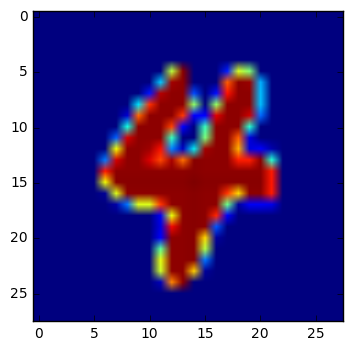

In [19]:
plt.imshow(X_val[0].reshape(28, 28))

In [20]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 0 0 0 0 0]


In [21]:
#Training the model
network_history = model.fit(X_train, Y_train, batch_size=128,epochs=2,verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 5s - loss: 2.1567 - acc: 0.3235 - val_loss: 2.0270 - val_acc: 0.5630
Epoch 2/2
45000/45000 [==============================] - 5s - loss: 1.9027 - acc: 0.6620 - val_loss: 1.7734 - val_acc: 0.7293


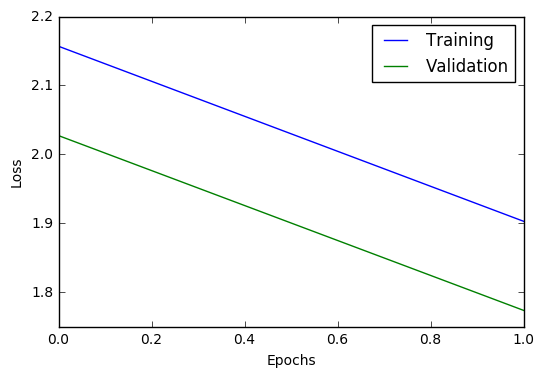

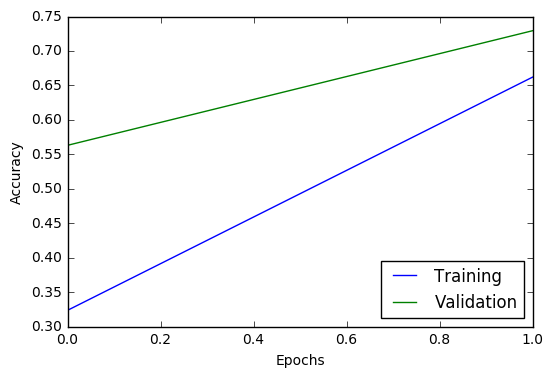

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [26]:
# %load solutions/sol23.py
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, batch_size=128, verbose=True, callbacks=[early_stop])

Train on 45000 samples, validate on 10000 samples
Epoch 1/100
45000/45000 [==============================] - 5s - loss: 1.3707 - acc: 0.6464 - val_loss: 0.6529 - val_acc: 0.8530
Epoch 2/100
45000/45000 [==============================] - 5s - loss: 0.6118 - acc: 0.8300 - val_loss: 0.4269 - val_acc: 0.8871
Epoch 3/100
45000/45000 [==============================] - 5s - loss: 0.4755 - acc: 0.8634 - val_loss: 0.3594 - val_acc: 0.9008
Epoch 4/100
45000/45000 [==============================] - 5s - loss: 0.4165 - acc: 0.8783 - val_loss: 0.3232 - val_acc: 0.9091
Epoch 5/100
45000/45000 [==============================] - 5s - loss: 0.3832 - acc: 0.8871 - val_loss: 0.3021 - val_acc: 0.9150
Epoch 6/100
45000/45000 [==============================] - 5s - loss: 0.3562 - acc: 0.8971 - val_loss: 0.2829 - val_acc: 0.9195
Epoch 7/100
45000/45000 [==============================] - 5s - loss: 0.3338 - acc: 0.9024 - val_loss: 0.2679 - val_acc: 0.9239
Epoch 8/100
45000/45000 [=============================

In [27]:
# We already used `summary`
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [29]:
score = model.evaluate(X_test,Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0740261988185
Test accuracy: 0.9759
